In [ ]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import skew, norm



In [ ]:
#2.1
#Read the dataset
df = pd.read_csv('/content/content_new.csv')
print(df.head(10))
print(df.tail(10))
print()



   content_id  rating  episode_count  season_count
0           1     NaN            NaN          19.0
1           2     4.0            NaN          15.0
2           3     8.0           28.0           NaN
3           4     0.0            5.0           1.0
4           5     2.0           29.0          10.0
5           6    10.0           37.0           1.0
6           7     7.0           24.0           1.0
7           8     7.0           17.0           5.0
8           9     1.0           19.0           NaN
9          10     1.0           25.0           5.0
     content_id  rating  episode_count  season_count
139         140     1.0            9.0           8.0
140         141     5.0           17.0           4.0
141         142     9.0            2.0           3.0
142         143     6.0           43.0           2.0
143         144     1.0            NaN           3.0
144         145     6.0           29.0          10.0
145         146     7.0            NaN           4.0
146         147

In [ ]:
#2.2
#Dataset info
print("Data Info is as follows:\n")
df.info()

Data Info is as follows:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   content_id     149 non-null    int64  
 1   rating         142 non-null    float64
 2   episode_count  130 non-null    float64
 3   season_count   136 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.8 KB


In [ ]:
#2.3
# Displaying columns with missing values and the count of missing values in each column
missing_data = df.isnull().sum()
print("Columns with missing values:")
print(missing_data[missing_data > 0])

# Calculating the percentage of missing values for each column and displaying them
missing_percentage = (missing_data / len(df)) * 100
print("\nPercentage of missing values for each column:")
print(missing_percentage)




Columns with missing values:
rating            7
episode_count    19
season_count     13
dtype: int64

Percentage of missing values for each column:
content_id        0.000000
rating            4.697987
episode_count    12.751678
season_count      8.724832
dtype: float64


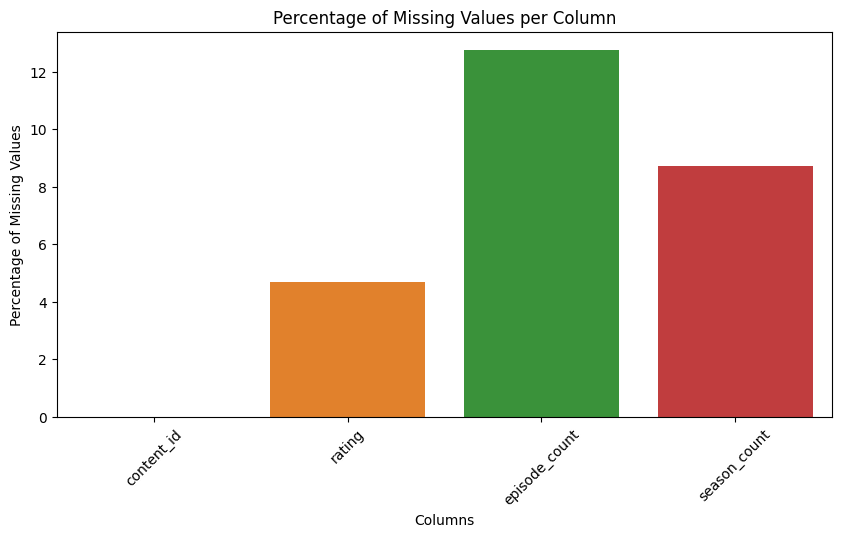

In [ ]:
#2.4 Creating a bar plot to visualize missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=45)
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values per Column")
plt.show()

In [ ]:
#3.1.1 Applying median imputation operation on column 'rating'


#3.1.2 Displaying the original before applying median imputation
print("\nBefore Median Imputation:")
print(df['rating'])




Before Median Imputation:
0      NaN
1      4.0
2      8.0
3      0.0
4      2.0
      ... 
144    6.0
145    7.0
146    6.0
147    2.0
148    8.0
Name: rating, Length: 149, dtype: float64


In [ ]:
#3.2.1 Calculating the median of the 'rating' column
median_rating = df['rating'].median()

#3.2.2 Performing median imputation on the 'rating' column
df['rating'].fillna(median_rating, inplace=False)

#3.2.3 Displaying the output after median imputation
print("\nAfter Median Imputation:")
print(df['rating'])



After Median Imputation:
0      NaN
1      4.0
2      8.0
3      0.0
4      2.0
      ... 
144    6.0
145    7.0
146    6.0
147    2.0
148    8.0
Name: rating, Length: 149, dtype: float64


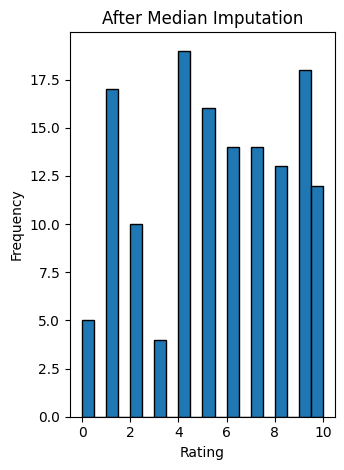

In [ ]:
#3.3 Plotting the histograms to show the result after applying the median imputation operation

plt.subplot(1, 2, 2)
plt.hist(df['rating'], bins=20, edgecolor='k')
plt.title("After Median Imputation")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Before Mean Imputation:
0       NaN
1       NaN
2      28.0
3       5.0
4      29.0
       ... 
144    29.0
145     NaN
146    12.0
147    22.0
148    11.0
Name: episode_count, Length: 149, dtype: float64


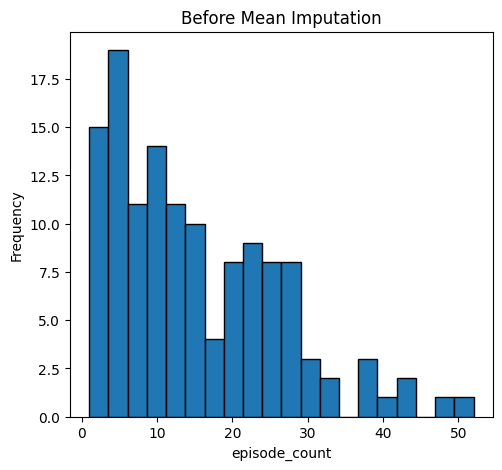

In [ ]:
#3.4 Applying mean imputation on 'episode_count'
# Plotting histograms to show the result before  mean imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['episode_count'], bins=20, edgecolor='k')
plt.title("Before Mean Imputation")
plt.xlabel("episode_count")
plt.ylabel("Frequency")
# Calculating the mean of the 'episode_count' column
mean_rating = df['episode_count'].mean()

# Displaying the output before mean imputation
print("\nBefore Mean Imputation:")
print(df['episode_count'])

# Performing mean imputation on the 'episode_count' column
df['episode_count'].fillna(mean_rating, inplace=True)










After Mean Imputation:
0      15.269231
1      15.269231
2      28.000000
3       5.000000
4      29.000000
         ...    
144    29.000000
145    15.269231
146    12.000000
147    22.000000
148    11.000000
Name: episode_count, Length: 149, dtype: float64


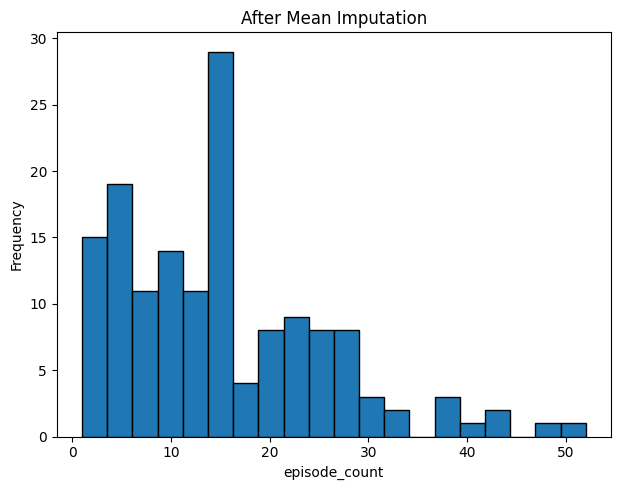

In [ ]:
#3.5 Displaying the output after mean imputation
print("\nAfter Mean Imputation:")
print(df['episode_count'])


# Plotting histograms to show the result before after imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.hist(df['episode_count'], bins=20, edgecolor='k')
plt.title("After Mean Imputation")
plt.xlabel("episode_count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Before Mode Imputation:
0      19.0
1      15.0
2       NaN
3       1.0
4      10.0
       ... 
144    10.0
145     4.0
146    10.0
147     2.0
148     2.0
Name: season_count, Length: 149, dtype: float64

After Mode Imputation:
0      19.0
1      15.0
2       1.0
3       1.0
4      10.0
       ... 
144    10.0
145     4.0
146    10.0
147     2.0
148     2.0
Name: season_count, Length: 149, dtype: float64


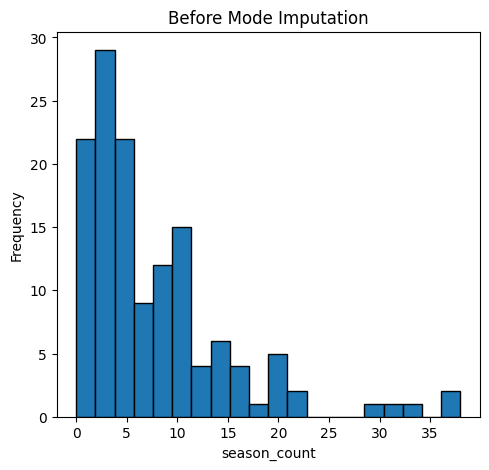

In [ ]:
# 3.6 Applying mode imputation on 'season_count'
#3.7 Plot histograms to show the result before  mode imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['season_count'], bins=20, edgecolor='k')
plt.title("Before Mode Imputation")
plt.xlabel("season_count")
plt.ylabel("Frequency")

# Calculate the mode of the 'season_count' column
mode_rating = df['season_count'].mode().iloc[0]

# Displaying the output before mode imputation
print("\nBefore Mode Imputation:")
print(df['season_count'])

# Performing mode imputation on the 'season_count' column
df['season_count'].fillna(mode_rating, inplace=True)

# Displaying the output after mode imputation
print("\nAfter Mode Imputation:")
print(df['season_count'])

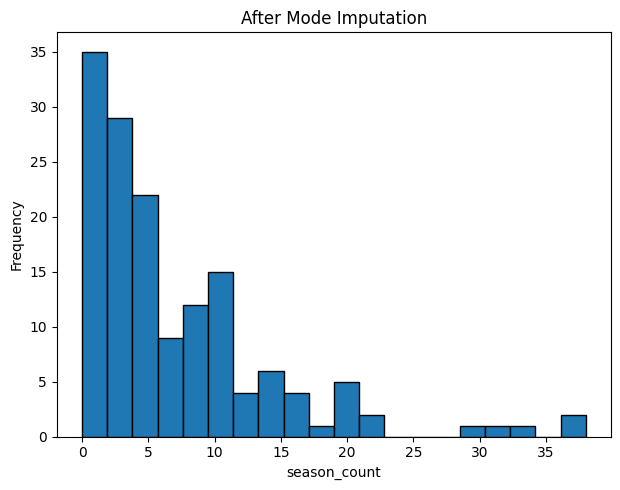

In [ ]:
#3.7 Plot histograms to show the result after  mode imputation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.hist(df['season_count'], bins=20, edgecolor='k')
plt.title("After Mode Imputation")
plt.xlabel("season_count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
#4.1 Applying one-hot encoding operation to fill NaN values with the mean value of the column before encoding
mean_season_count = df['season_count'].mean()
df['season_count'].fillna(mean_season_count, inplace=True)

#4.2 Applying one-hot encoding on the 'season_count' column
df_encoded = pd.get_dummies(df, columns=['season_count'], drop_first=True)

#4.3 Displaying the output after one-hot encoding
print("\nAfter One-Hot Encoding with NaNs filled by mean value:")
print(df_encoded)



After One-Hot Encoding with NaNs filled by mean value:
     content_id  rating  episode_count  season_count_1.0  season_count_2.0  \
0             1     NaN      15.269231                 0                 0   
1             2     4.0      15.269231                 0                 0   
2             3     8.0      28.000000                 1                 0   
3             4     0.0       5.000000                 1                 0   
4             5     2.0      29.000000                 0                 0   
..          ...     ...            ...               ...               ...   
144         145     6.0      29.000000                 0                 0   
145         146     7.0      15.269231                 0                 0   
146         147     6.0      12.000000                 0                 0   
147         148     2.0      22.000000                 0                 1   
148         149     8.0      11.000000                 0                 1   

     se

Skewness: nan
Distribution is left-skewed.


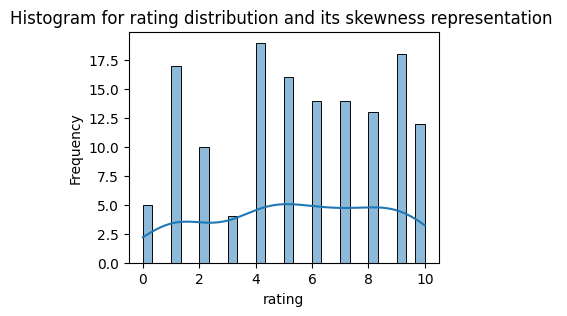

In [ ]:
#5.1 Plotting the histogram to show the distribution and skewness of the 'rating' column


plt.figure(figsize=(4, 3))
sns.histplot(df['rating'], bins=30, kde=True)
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Histogram for rating distribution and its skewness representation ')

#5.2 Calculating skewness
skewness = skew(df['rating'])
print(f'Skewness: {skewness:.2f}')

#5.3 Checking if the distribution is normal, right-skewed or left-skewed
if abs(skewness) < 0.5:
    print('Distribution is approximately normal.')
elif skewness > 0.5:
    print('Distribution is right-skewed.')
else:
    print('Distribution is left-skewed.')

plt.show()

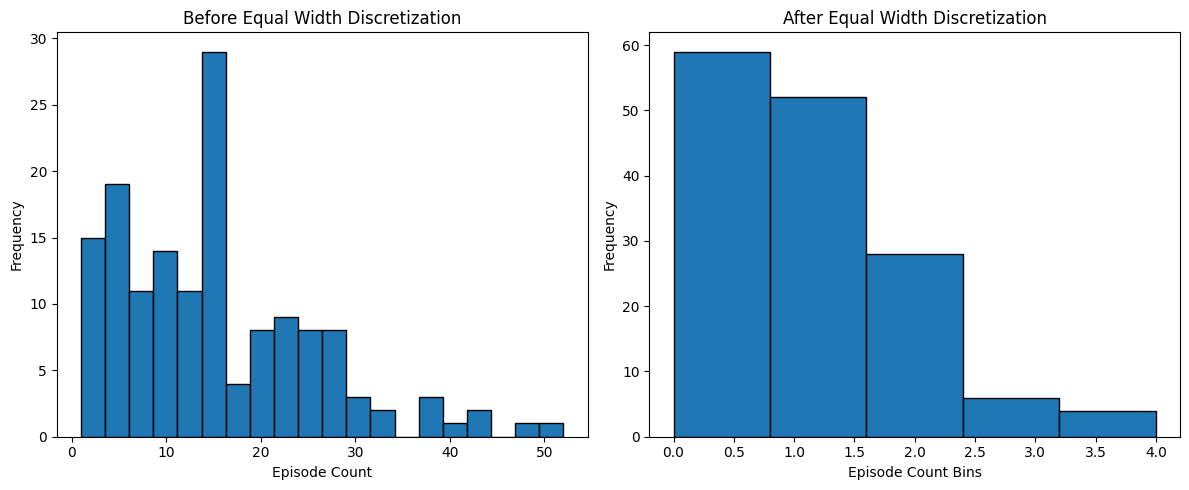

In [ ]:
#6 Applying equal width discretization on 'episode_count' and display the before and after graph
#6.1 Calculate the median of the 'rating' column
median_rating = df['episode_count'].median()

#6.2 Performing median imputation on the 'rating' column
df['episode_count'].fillna(median_rating, inplace=True)

#6.3 Applying equal width discretization on 'episode_count' and displaying the before and after graph
kbins_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['episode_count_bins'] = kbins_discretizer.fit_transform(df[['episode_count']])

#6.4 Plotting the result before and after operation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['episode_count'], bins=20, edgecolor='k')
plt.title("Before Equal Width Discretization")
plt.xlabel("Episode Count")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df['episode_count_bins'], bins=5, edgecolor='k')
plt.title("After Equal Width Discretization")
plt.xlabel("Episode Count Bins")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

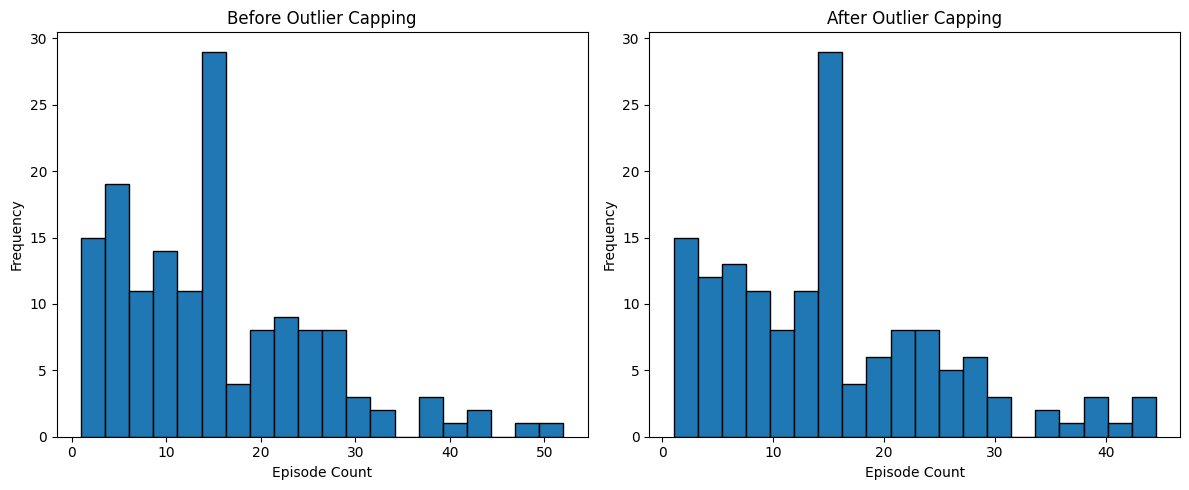

In [ ]:
#7 Outlier Capping
#7.1 Applying outlier capping using quantiles and plot the result graph
q1 = df['episode_count'].quantile(0.25)
q3 = df['episode_count'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df['episode_count_capped'] = np.where(df['episode_count'] < lower_bound, lower_bound, df['episode_count'])
df['episode_count_capped'] = np.where(df['episode_count'] > upper_bound, upper_bound, df['episode_count'])

#7.2 Plotting the result graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['episode_count'], bins=20, edgecolor='k')
plt.title("Before Outlier Capping")
plt.xlabel("Episode Count")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df['episode_count_capped'], bins=20, edgecolor='k')
plt.title("After Outlier Capping")
plt.xlabel("Episode Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

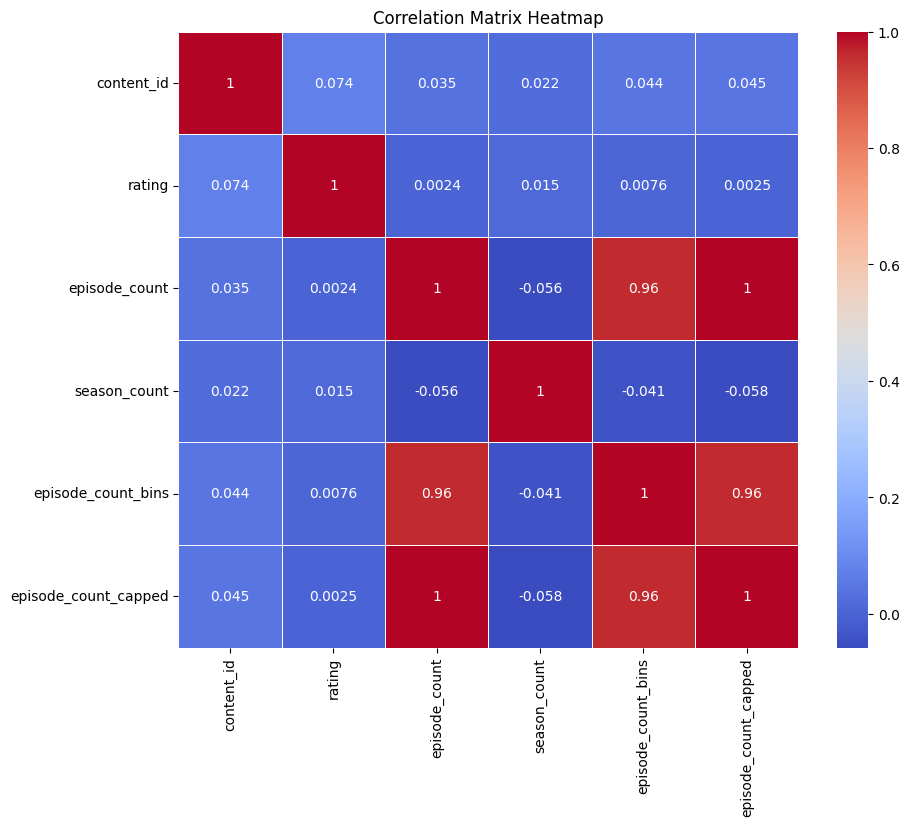

In [ ]:
#8 Plotting the correlation matrix heatmap for feature selection of all columns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

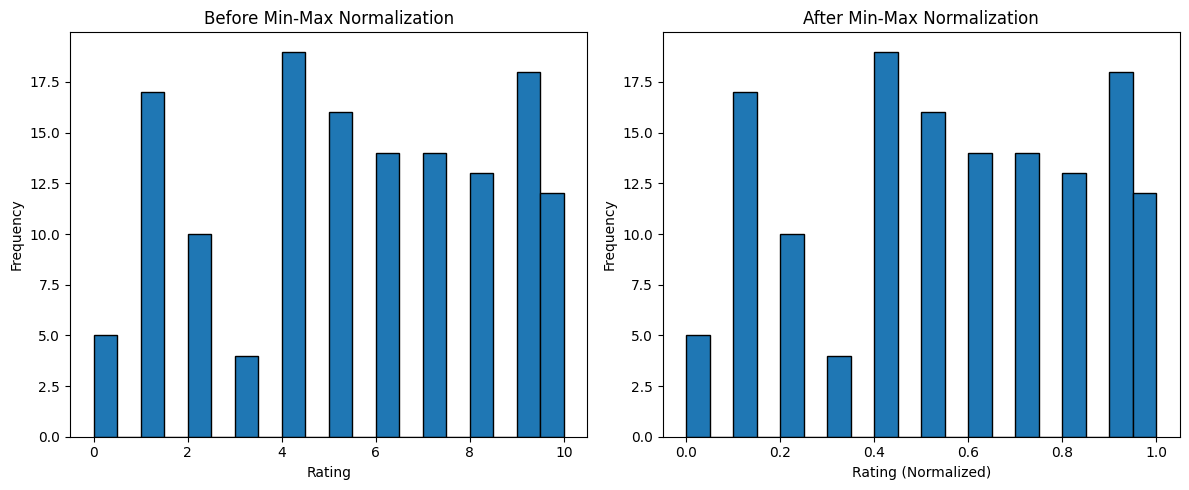

In [ ]:
#9.1 Applying Min-Max normalization and plotting the graph before and after applying the operation
min_max_scaler = MinMaxScaler()
df['rating_normalized'] = min_max_scaler.fit_transform(df[['rating']])

#9.2 Plot the result before and after operation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['rating'], bins=20, edgecolor='k')
plt.title("Before Min-Max Normalization")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df['rating_normalized'], bins=20, edgecolor='k')
plt.title("After Min-Max Normalization")
plt.xlabel("Rating (Normalized)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
